# Importing the Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
from xgboost import XGBClassifier


import plotly.figure_factory as ff
import warnings
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')

import os



# Reading the Dataset

In [ ]:
data = pd.read_csv("mushrooms.csv")
data.head()

# Exploratory Data Analysis

In [ ]:
labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], 
          data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', 
                  marker=dict(line=dict(color='#000000', width=2), 
                              colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', 
                  title_x=0.5, title_font=dict(size=28))
fig.show()

# Cap Shapes

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

# Cap Surfaces

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-surface',
                      hue='class',
                      order=data['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

# Cap Colors

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-color',
                      hue='class',
                      order=data['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 
                       'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

# Bruises

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='bruises',
                      hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=20)

# Odor

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='odor',
                      hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Odor', fontsize=20)

****

# Gill Attachments
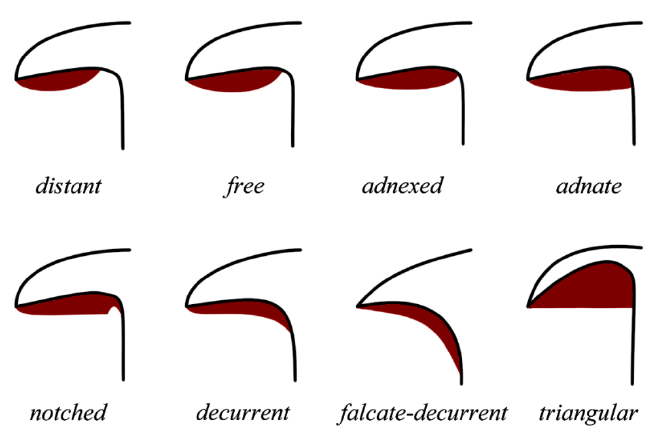

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-attachment',
                      hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Attachments', fontsize=20)

# Gill Spacing

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-spacing',
                      hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Spacing', fontsize=20)

# Gill Color

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 
                       'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)

# Stalk Shape

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-shape',
                      hue='class',
                      order=data['stalk-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarging'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shapes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Shapes', fontsize=20)

# Stalk Root

In [ ]:
# The stalk-root feature has missing values. 
#I filled the missing values with the most frequent object which is 'b'.
data = data.replace(['?'], 'b')

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-root',
                      hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Root', fontsize=20)

# Stalk Surface Above and Below Ring

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-surface-above-ring',
                      hue='class',
                      order=data['stalk-surface-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Above Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring', fontsize=20)


In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-surface-below-ring',
                      hue='class',
                      order=data['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Below Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring', fontsize=20)


# Veil Types
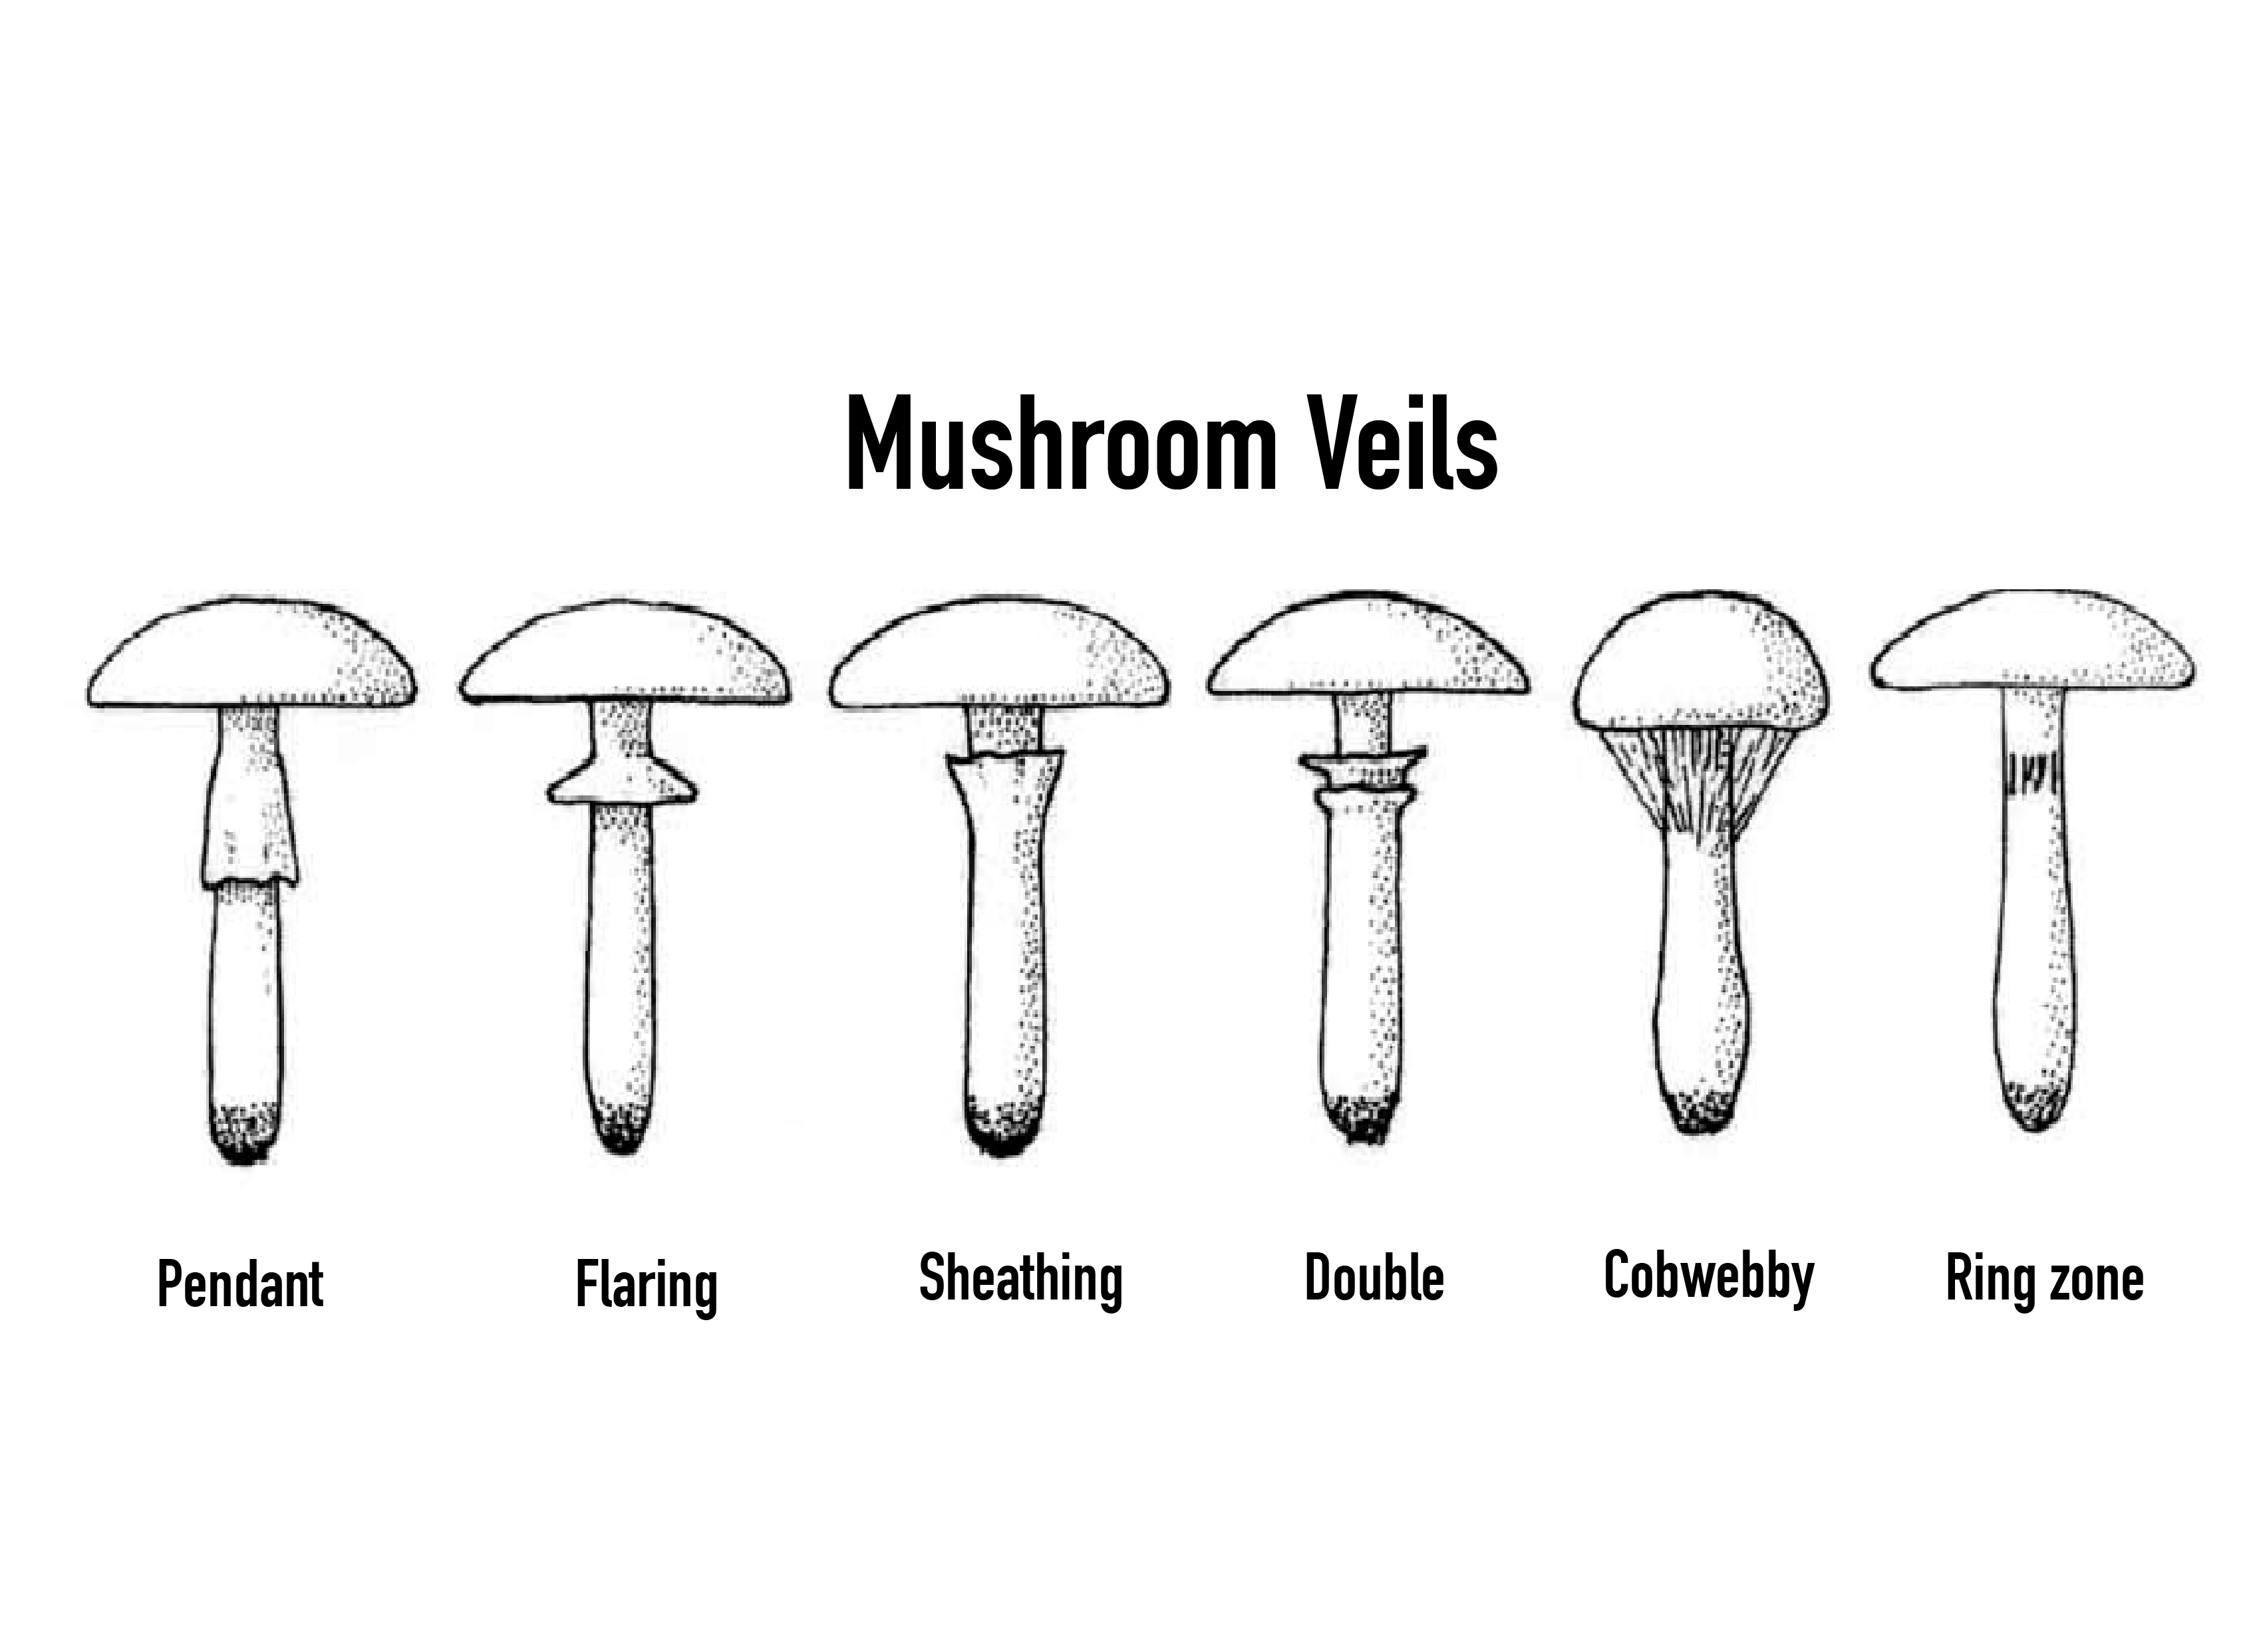

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='veil-type',
                      hue='class',
                      order=data['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Partial'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veils', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Types', fontsize=20)

# Veil Colors

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='veil-color',
                      hue='class',
                      order=data['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Veil Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Colors', fontsize=20)

# Number of the Rings

In [ ]:
x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [[data[data['class'] == 'p']['ring-number'].value_counts()[2],
      data[data['class'] == 'p']['ring-number'].value_counts()[0],
      data[data['class'] == 'p']['ring-number'].value_counts()[1]],
     [0, data[data['class'] == 'e']['ring-number'].value_counts()[0],
      data[data['class'] == 'e']['ring-number'].value_counts()[1]]
     ]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='magma')
fig.update_layout(title_text='Heatmap of the Mushrooms by their Classes vs Number of the Rings',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis=dict(
    tickfont=dict(size=15),
),
    yaxis=dict(tickfont=dict(size=15)))
fig.show()

# Ring Types
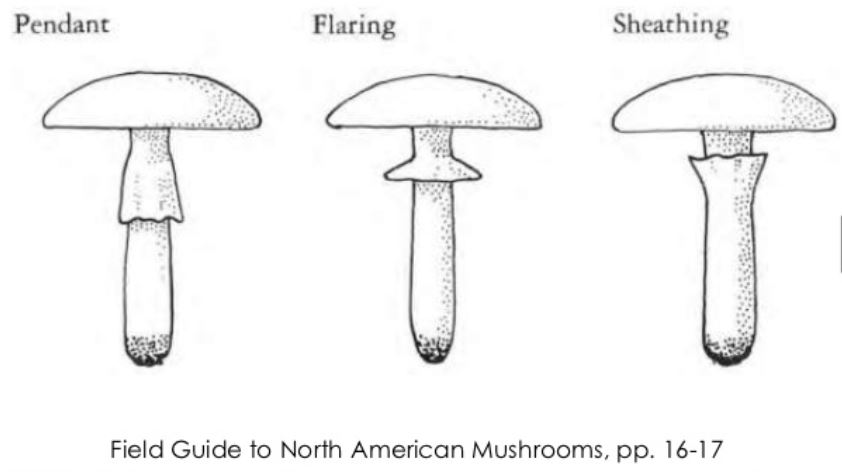

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='ring-type',
                      hue='class',
                      order=data['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Types', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring Types', fontsize=20)

# Spore Print Colors

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='spore-print-color',
                      hue='class',
                      order=data['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 
                       'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Spore Print Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Spore Print Color', fontsize=20)


# Populations

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='population',
                      hue='class',
                      order=data['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)

# Habitats

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='habitat',
                      hue='class',
                      order=data['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)

# Data Pre-Process

****

In [ ]:
count_NaN = data.isna().sum()
count_NaN

# There no missing data points, actually there were some data points for the "stalk-type" feature. But I filled the missing values with the most frequent one which is 'b'

In [ ]:
# Encoding the string-type data points

data2 = pd.get_dummies(data)

y = data2[['class_e', 'class_p']]   # The label for the machine learning models
X = data2.drop(['class_e', 'class_p'], axis=1)   #Features

X

# Train-Test Split

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, 
                                                test_size=0.2, shuffle=True, random_state=13)
trainX.head()

In [ ]:
# trainY set which is labels
trainY.head()

# XGBClassifier

In [ ]:
model = XGBClassifier(learning_rate=0.005, max_depth=10, n_estimators=30,
                      colsample_bytree=0.3, min_child_weight=0.5, reg_alpha=0.3,
                      )
model.fit(trainX, trainY['class_e'])

In [ ]:
predictions_XGBC = model.predict(testX)
acc_XGBC = accuracy_score(predictions_XGBC, testY['class_e'])
print('----------------------------------------------------')
print('Accuracy of XGBClassifier: {}%'.format(acc_XGBC*100))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(random_state=96)
ada_clf.fit(trainX, trainY['class_e'])

In [ ]:
predictions_ada = ada_clf.predict(testX)
acc_ada = accuracy_score(predictions_ada, testY['class_e'])
print('----------------------------------------------------')
print('Accuracy of XGBClassifier: {}%'.format(acc_ada*100))

In [ ]:
scores = pd.DataFrame()

#Create a columns using the feature names
scores['Feature_names'] = trainX.columns #extract column names from X train dataframe
scores['Features_importances'] = ada_clf.feature_importances_

#sort the dataframe to view the top most important variables.
scores.sort_values(by=['Features_importances'], ascending=False).head(10)